<a href="https://colab.research.google.com/github/laugustovieira/prophet_covid/blob/main/desafio_modulo03_aula02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
url = '/content/drive/MyDrive/Dados_BootCamp/dados_covid_sp.csv'
import pandas as pd
import matplotlib.pyplot as plt
dados = pd.read_csv(url, sep=";")
dados["datahora"] = pd.to_datetime(dados["datahora"], format="%Y-%m-%d")
dados_sp = dados.query("nome_munic == 'São Paulo'")

#Desafio 08: Mudar os períodos de previsão.

In [ ]:
df2 = pd.DataFrame()
df2['ds'] = dados_sp['datahora'][:400]
df2['y'] = dados_sp['casos_novos'][:400]
from fbprophet import Prophet
modelo2 = Prophet()
modelo2.fit(df2)
dataFramefuturo2 = modelo2.make_future_dataframe(periods=365)
previsao2 = modelo2.predict(dataFramefuturo2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
df2_teste = pd.DataFrame()
df2_teste['ds'] = dados_sp['datahora'][400:]
df2_teste['y'] = dados_sp['casos_novos'][400:]

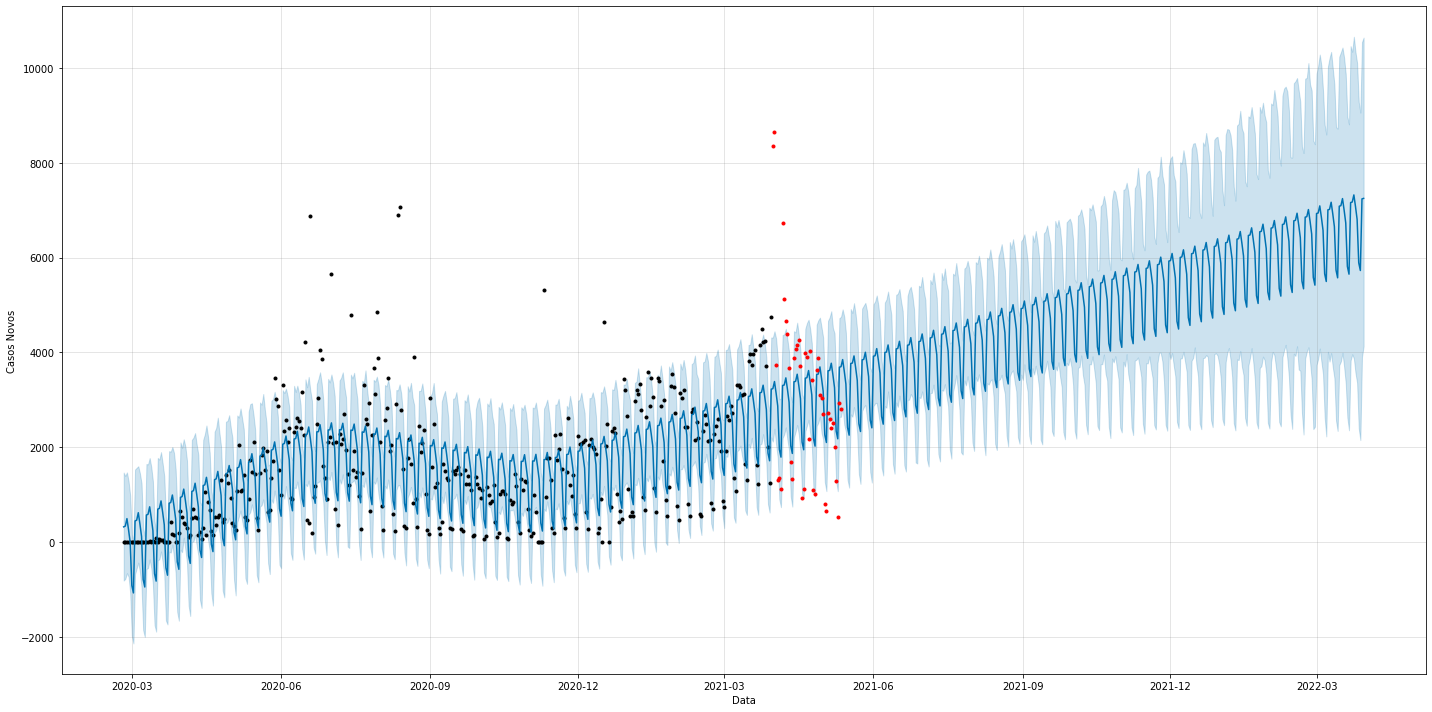

In [ ]:
modelo2.plot(previsao2, xlabel="Data", ylabel="Casos Novos", figsize=(20,10));
plt.plot(df2_teste['ds'], df2_teste['y'],'.r')

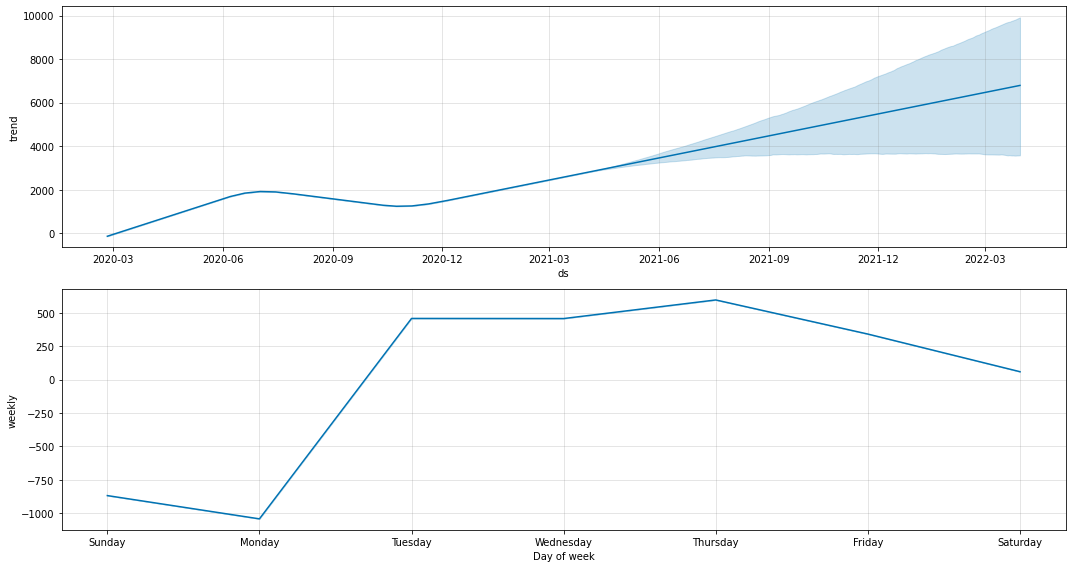

In [ ]:
modelo2.plot_components(previsao2, figsize = (15,8));

Usando um período menor para de dado para treino (200 dias) <br>
Os pontos vermelos são usados para teste para verificar o período de previsão.

In [ ]:
df2 = pd.DataFrame()
df2['ds'] = dados_sp['datahora'][:200]
df2['y'] = dados_sp['casos_novos'][:200]
from fbprophet import Prophet
modelo2 = Prophet()
modelo2.fit(df2)
dataFramefuturo2 = modelo2.make_future_dataframe(periods=565)
previsao2 = modelo2.predict(dataFramefuturo2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
df2_teste = pd.DataFrame()
df2_teste['ds'] = dados_sp['datahora'][200:]
df2_teste['y'] = dados_sp['casos_novos'][200:]

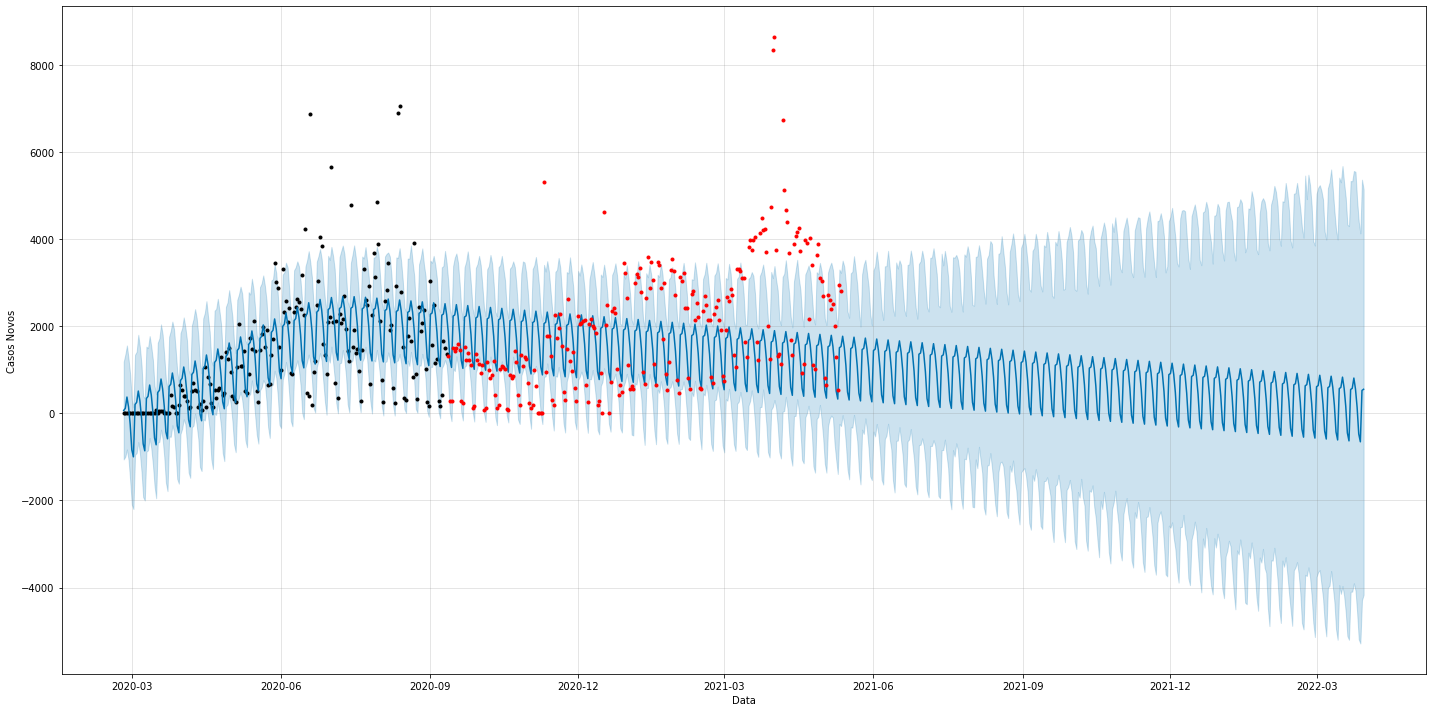

In [ ]:
modelo2.plot(previsao2, xlabel="Data", ylabel="Casos Novos", figsize=(20,10));
plt.plot(df2_teste['ds'], df2_teste['y'],'.r')

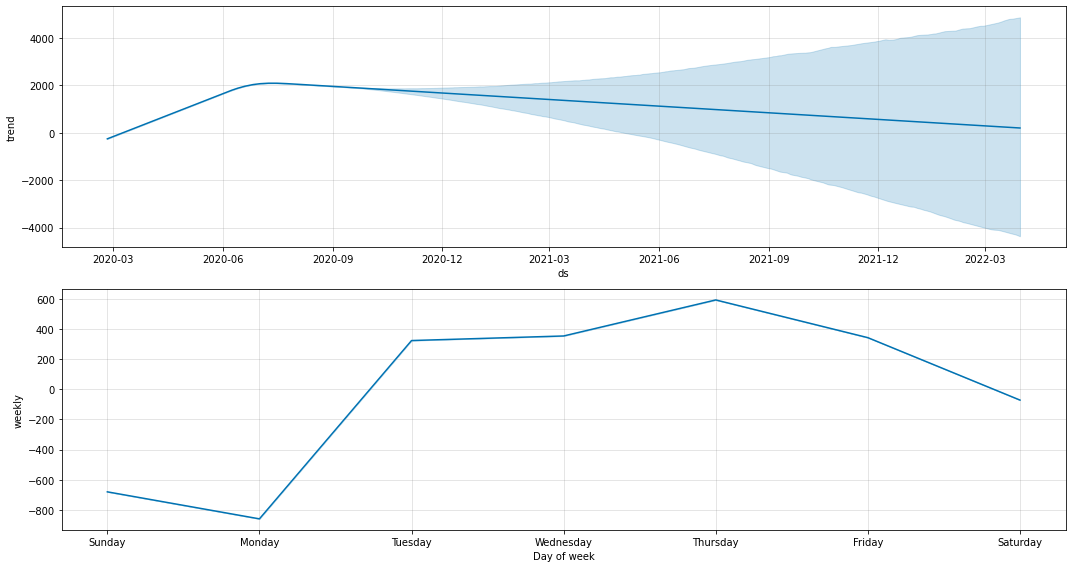

In [ ]:
modelo2.plot_components(previsao2, figsize = (15,8));

#Desafio 09: Explorar a documentação do Prophet e melhorar os gráficos.

###Previsão de crescimento


#Desafio 10: Fazer todo o processo de previsão para o número de casos acumulados.